# **USED BIKE PRICE PREDICTION USING LINEAR REGRESSION**

**This notebook implements the Multiple Linear Regression to predict the price of used bikes using diffrent features like type of onwership, Kilometer driven,Brand, Power etc.**

## **Importing dependancies**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## **Importing Data**

In [6]:
df = pd.read_csv('Used_Bikes.csv')
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha


# **EDA ANALYSIS ON DATA**

## **Getting the names of all features**

In [7]:
for col in df.columns:
    print(col)

bike_name
price
city
kms_driven
owner
age
power
brand


## **Checking for Null Values in Data**

In [8]:
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

## **Converting Price for visualization**

In [9]:
price=(df['price']/1000)
price.rename("s_price", inplace=True)
sprice_df = pd.concat([df,price],axis=1)
s_price_df=sprice_df.drop(['price'],axis=1)
s_price_df.head()

,bike_name,city,kms_driven,owner,age,power,brand,s_price
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,17654,First Owner,3,110,TVS,35.0
1,Royal Enfield Classic 350cc,Delhi,11000,First Owner,4,350,Royal Enfield,119.9
2,Triumph Daytona 675R,Delhi,110,First Owner,8,675,Triumph,600.0
3,TVS Apache RTR 180cc,Bangalore,16329,First Owner,4,180,TVS,65.0
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,10000,First Owner,3,150,Yamaha,80.0


[Text(0.5, 0, 'Price(in 1000)'), Text(0, 0.5, 'Type of Owner')]

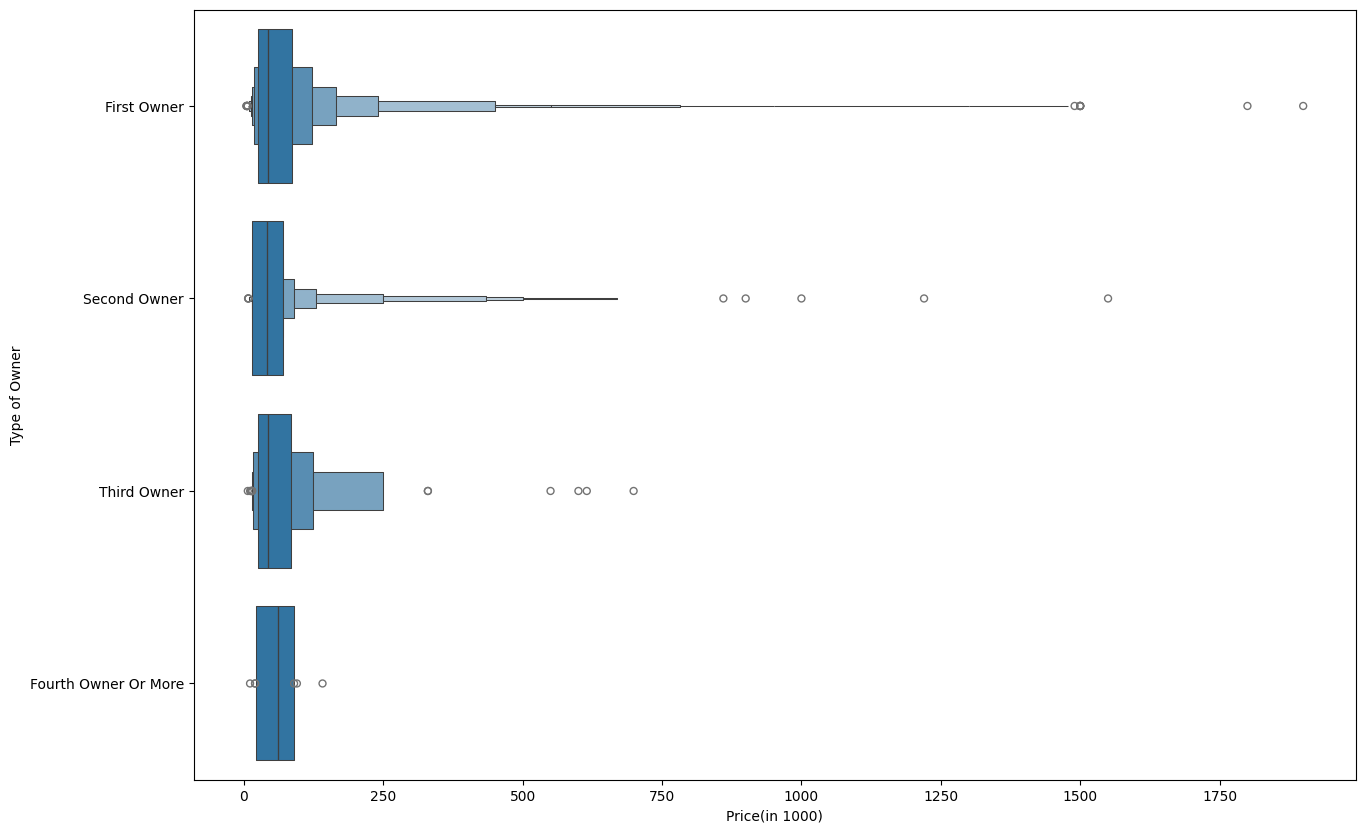

In [10]:
plt.figure(figsize = (15,10))
sns.boxenplot(x="s_price",y="owner",data=s_price_df).set(xlabel='Price(in 1000)',ylabel='Type of Owner')

[Text(0.5, 0, 'Price(in 1000)'), Text(0, 0.5, 'KM dirven')]

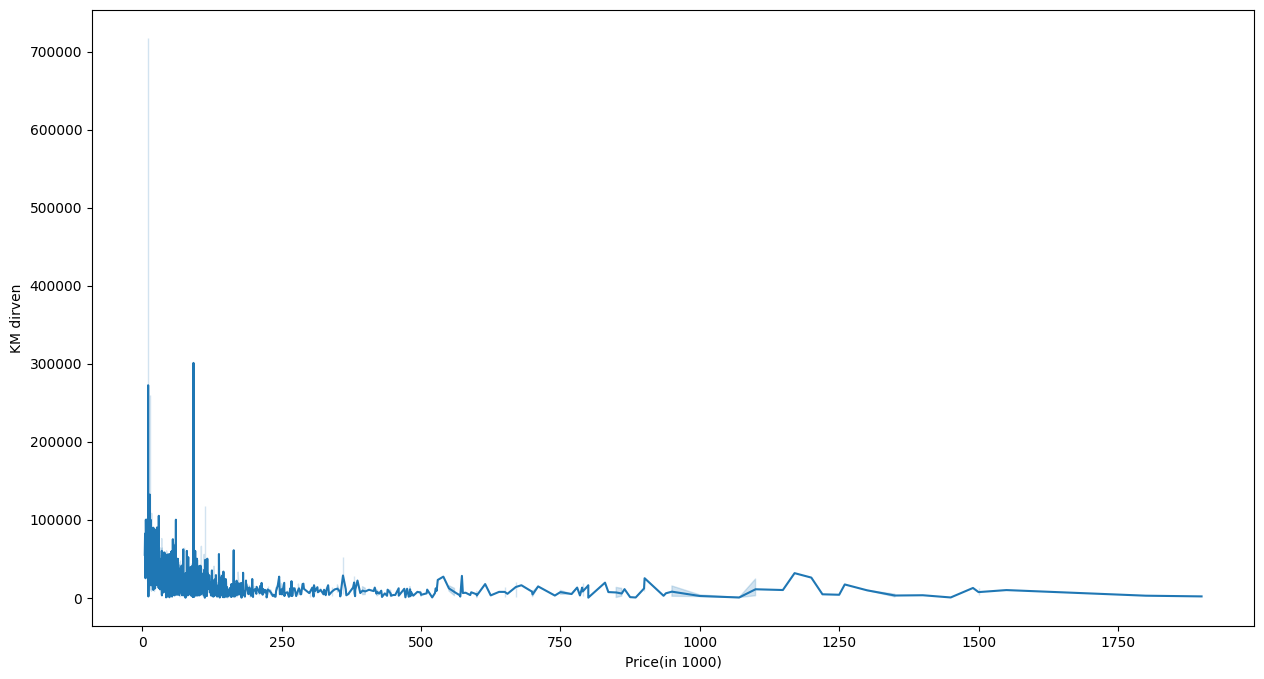

In [11]:
plt.figure(figsize = (15,8))
sns.lineplot(x="s_price",y="kms_driven",data=s_price_df).set(xlabel='Price(in 1000)',ylabel='KM dirven')

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Price(in 1000)')]

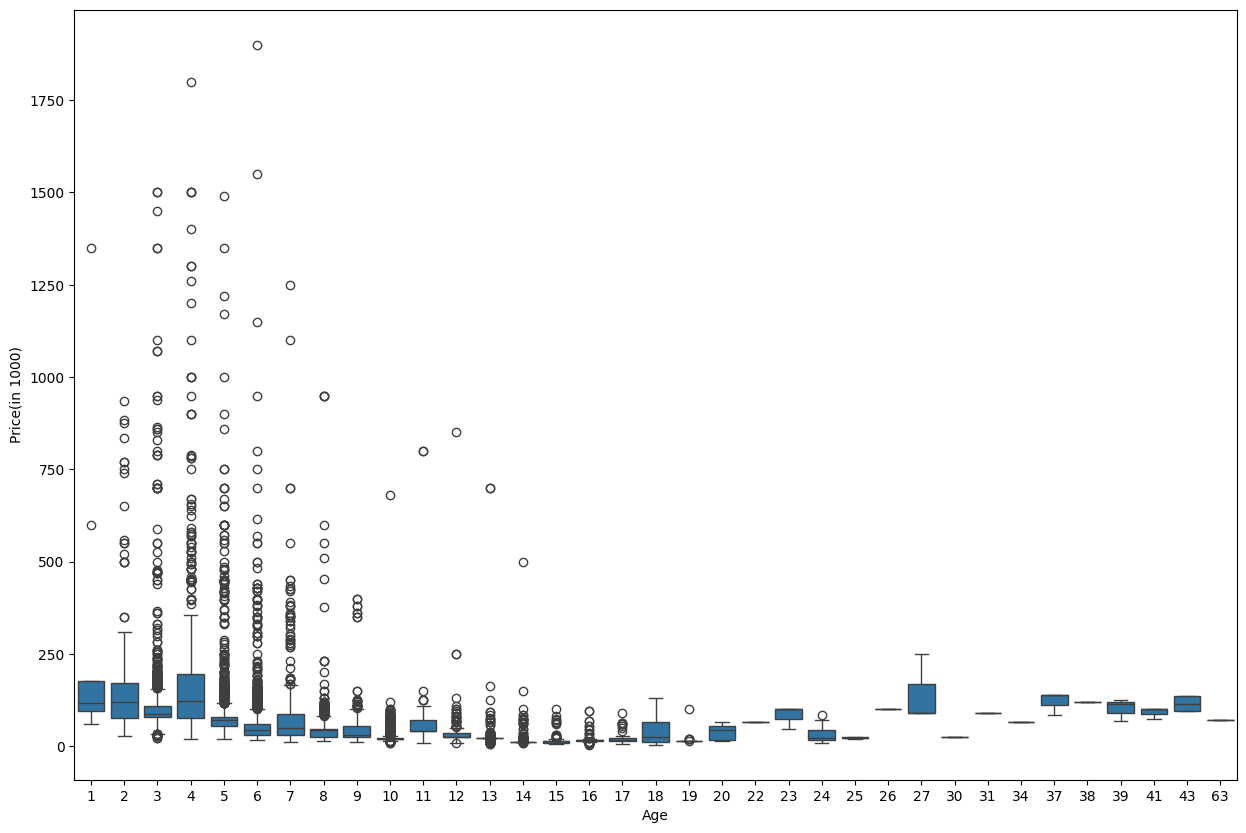

In [12]:
plt.figure(figsize = (15,10))
sns.boxplot(x='age',y='s_price',data=s_price_df).set(xlabel='Age',ylabel='Price(in 1000)')

[Text(0.5, 0, 'Power'), Text(0, 0.5, 'Price(in 1000)')]

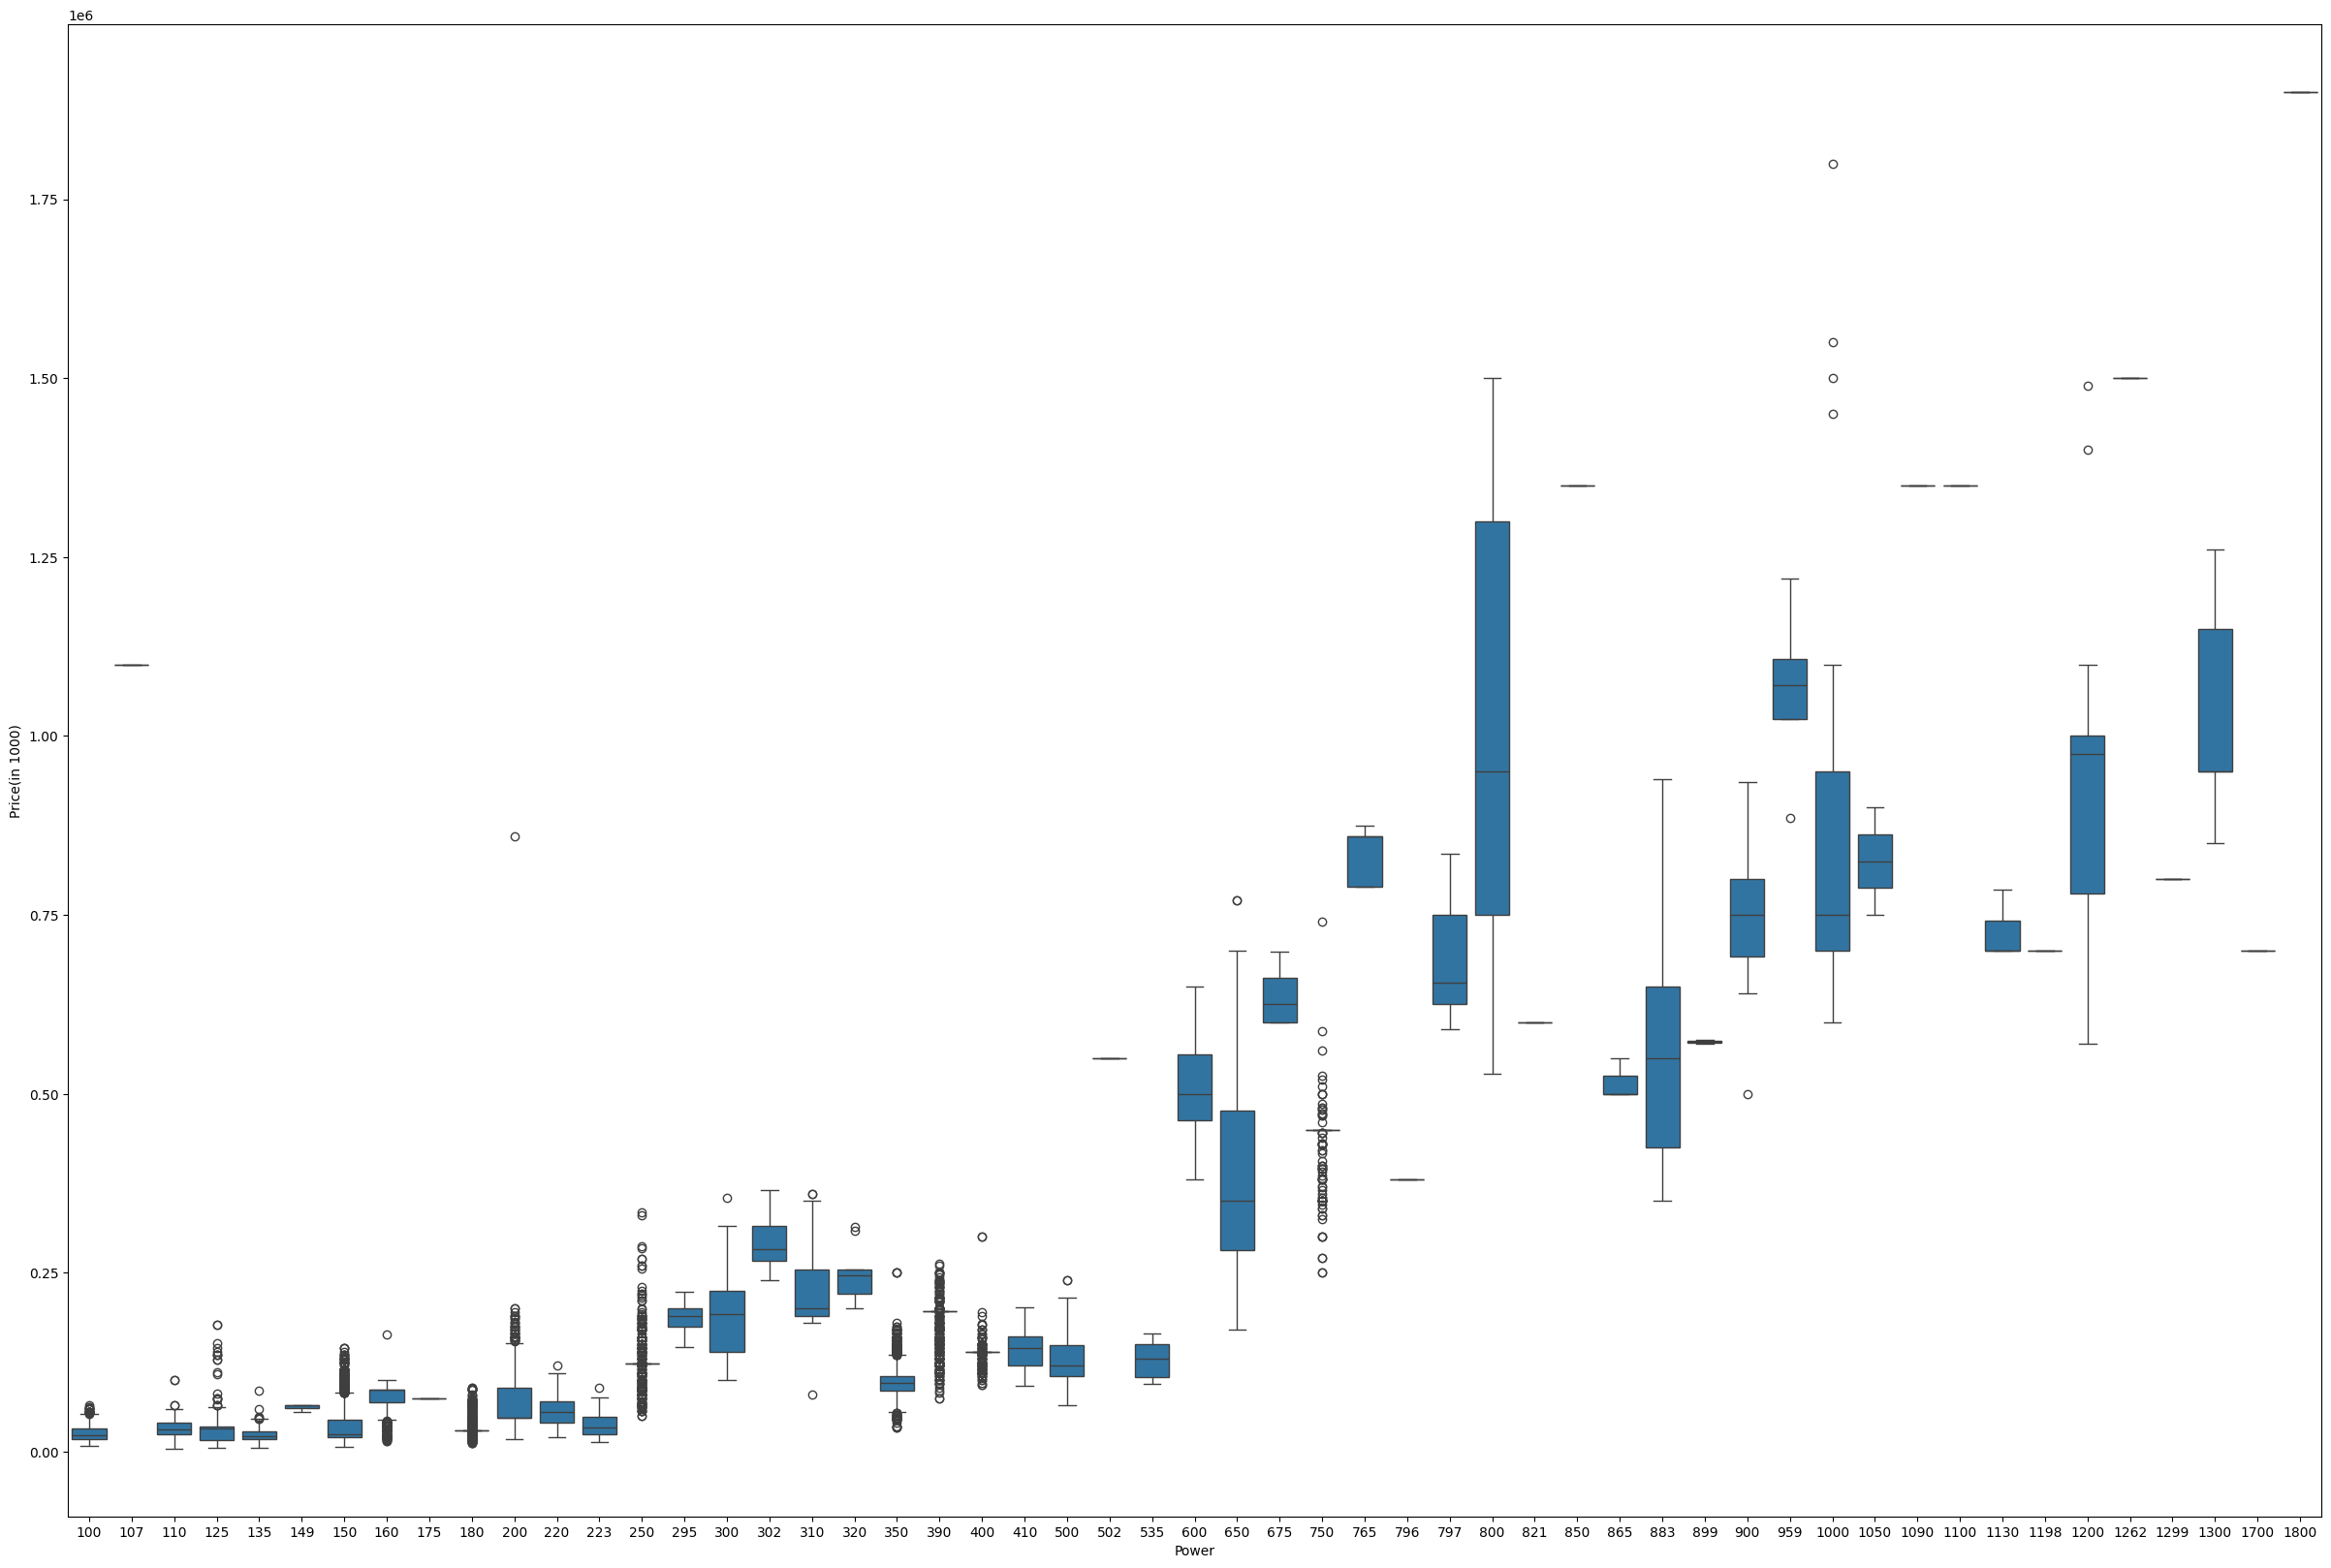

In [13]:
plt.figure(figsize = (30,20))
sns.boxplot(x='power',y='price',data=df).set(xlabel='Power',ylabel='Price(in 1000)')

# **DATA PREPARATION FOR MODELLING**

## **Creating Dummies to Process Srting Data**

**Dummies for Type of Ownership**

In [14]:
owner_dummies=pd.get_dummies(df.owner)
owner_dummies.head()

,First Owner,Fourth Owner Or More,Second Owner,Third Owner
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False


**Dummies for different Brands**

In [15]:
brand_dummies=pd.get_dummies(df.brand)
brand_dummies.head()

,BMW,Bajaj,Benelli,Ducati,Harley-Davidson,Hero,Honda,Hyosung,Ideal,Indian,...,LML,MV,Mahindra,Rajdoot,Royal Enfield,Suzuki,TVS,Triumph,Yamaha,Yezdi
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


**Merging Dummies with Data**

In [16]:
merged_df = pd.concat([df,owner_dummies,brand_dummies],axis=1)
merged_df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand,First Owner,Fourth Owner Or More,...,LML,MV,Mahindra,Rajdoot,Royal Enfield,Suzuki,TVS,Triumph,Yamaha,Yezdi
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS,True,False,...,False,False,False,False,False,False,True,False,False,False
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield,True,False,...,False,False,False,False,True,False,False,False,False,False
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph,True,False,...,False,False,False,False,False,False,False,True,False,False
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS,True,False,...,False,False,False,False,False,False,True,False,False,False
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha,True,False,...,False,False,False,False,False,False,False,False,True,False


**Dropping Unwanted Columns**

In [17]:
final_df=merged_df.drop(['brand','BMW','owner','Fourth Owner Or More','bike_name','city'],axis=1)
final_df.head()

,price,kms_driven,age,power,First Owner,Second Owner,Third Owner,Bajaj,Benelli,Ducati,...,LML,MV,Mahindra,Rajdoot,Royal Enfield,Suzuki,TVS,Triumph,Yamaha,Yezdi
0,35000,17654,3,110,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,119900,11000,4,350,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,600000,110,8,675,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,65000,16329,4,180,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,80000,10000,3,150,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


# **MAKING MODEL USING LINEAR REGRESSION**

## **Defining Dependent and Independent Variables**

**Dependent variable will be everything apart from price**

In [18]:
x= final_df.drop(['price'],axis=1)
x.head()

,kms_driven,age,power,First Owner,Second Owner,Third Owner,Bajaj,Benelli,Ducati,Harley-Davidson,...,LML,MV,Mahindra,Rajdoot,Royal Enfield,Suzuki,TVS,Triumph,Yamaha,Yezdi
0,17654,3,110,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,11000,4,350,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,110,8,675,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,16329,4,180,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,10000,3,150,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


**Independent variable will be price**

In [19]:
y= final_df[['price']]
y.head()

,price
0,35000
1,119900
2,600000
3,65000
4,80000


## **Splitting Test and Train data sets**

**Train and Test data is split by 80-20 ratio, also Train data is fixed**

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

## **Model Training**

In [21]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## **Checking Model Accuracy**

In [22]:
accuracy=(model.score(x_test,y_test))*100
print('Model Accuracy:', accuracy)

Model Accuracy: 89.93378607605392


In [23]:
import joblib

# Save your trained model to a file named 'bike_price_model.pkl'
joblib.dump(model, 'bike_price_model.pkl')

# Save the feature columns (e.g., from your DataFrame X) to 'model_columns.pkl'
joblib.dump(x.columns, 'model_columns.pkl')


['model_columns.pkl']